In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Escalado de Datos
from sklearn.preprocessing import StandardScaler

#Polynomial
from sklearn.preprocessing import PolynomialFeatures

#Models
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

#Metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = '/content/drive/MyDrive/Data/properati.csv'
data = pd.read_csv(url)

In [3]:
def valores_nulos(dataset):
  print('<------------->')
  print('Porcentaje de Valores nulos\n')
  print(dataset.isnull().sum() / dataset.shape[0] * 100)

# Filtrado de Información

Empleo el mismo filtro que se solicitaba en el Proyecto 1, en donde se emplea únicamente los Datos de propiedades registradas en Capital Federal.

In [4]:
data_ml=data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento', 'Casa', 'PH']))]

In [5]:
data_ml = data_ml[(data_ml.surface_total >= 15)] 
data_ml = data_ml[(data_ml.surface_total <= 1000)]
print('valor minimo en superficie total', data_ml.surface_total.min())
print('valor maximo en superficie total', data_ml.surface_total.max())

valor minimo en superficie total 15.0
valor maximo en superficie total 1000.0


In [6]:
data_ml = data_ml[(data_ml.price <= 4000000 )]

In [7]:
data_ml = data_ml[['l3','property_type','rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [8]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.068311
surface_total      0.000000
surface_covered    0.627633
price              0.000000
dtype: float64


In [9]:
#¿Presencia de valores invertidos?
datos_invertidos= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos),'datos invertidos')

Existen 751 datos invertidos


In [10]:
#Limpieza de valores invertidos
data_ml = data_ml[(data_ml.surface_total >= data_ml.surface_covered)]

In [11]:
#Comprobación 
datos_invertidos_2= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos_2),'datos invertidos')

Existen 0 datos invertidos


In [12]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.022132
surface_total      0.000000
surface_covered    0.000000
price              0.000000
dtype: float64


In [13]:
#Eliminar informacion duplicada
data_ml.drop_duplicates(inplace=True)

In [14]:
#Copia
data_py2 = data_ml.copy()

#EDA

## Imputación de Valores faltantes

In [16]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.00000
property_type      0.00000
rooms              0.00000
bathrooms          1.47145
surface_total      0.00000
surface_covered    0.00000
price              0.00000
dtype: float64


In [17]:
#Elimino valores nulos en dataset copia
data_py2.dropna(inplace=True)

In [18]:
#Agrupación segun el tipo de propiedad
mean_bt = data_py2.groupby('property_type')['bathrooms'].mean().round(0)

In [19]:
mean_bt = dict(round(mean_bt))
mean_bt

{'Casa': 2.0, 'Departamento': 2.0, 'PH': 1.0}

In [20]:
data_ml.bathrooms = data_ml.bathrooms.fillna(data_ml.property_type.map(mean_bt))

In [21]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.0
property_type      0.0
rooms              0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
dtype: float64


In [22]:
break

SyntaxError: ignored

# Intento

https://github.com/traintestbritt/predicting_house_prices/blob/master/notebook-house_price_predictions-brittany_allen.ipynb

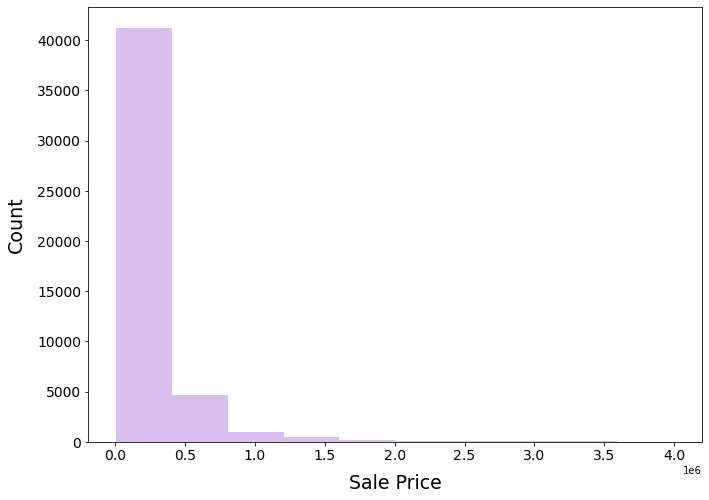

In [23]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(data_ml.price, kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

In [24]:
data_ml.price.describe()

count    4.777600e+04
mean     2.638013e+05
std      2.914023e+05
min      6.000000e+03
25%      1.230000e+05
50%      1.780000e+05
75%      2.890000e+05
max      4.000000e+06
Name: price, dtype: float64

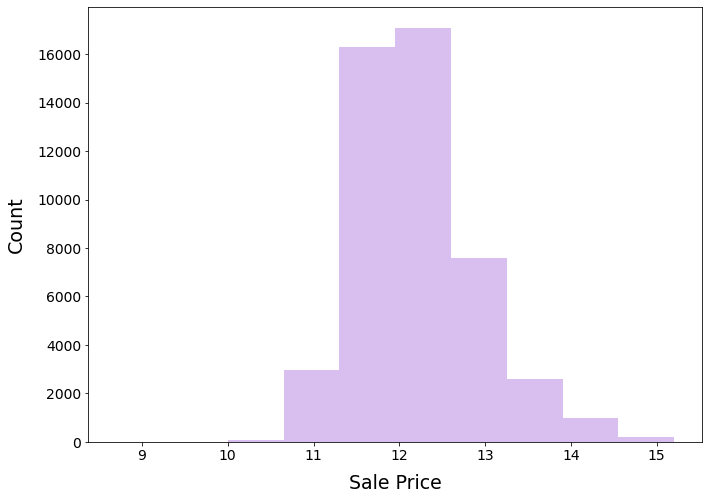

In [25]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(data_ml.price), kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

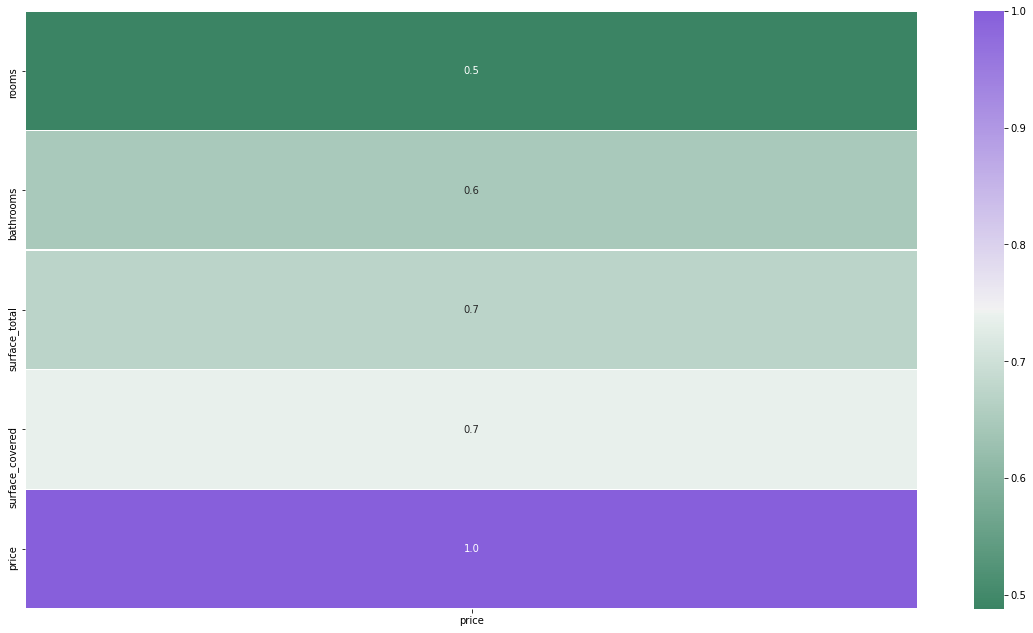

In [26]:
fig, ax = plt.subplots(figsize = (20, 11))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(data_ml.corr()[['price']][round(data_ml.corr()['price'].sort_values(ascending=False), 1) >= .5], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);

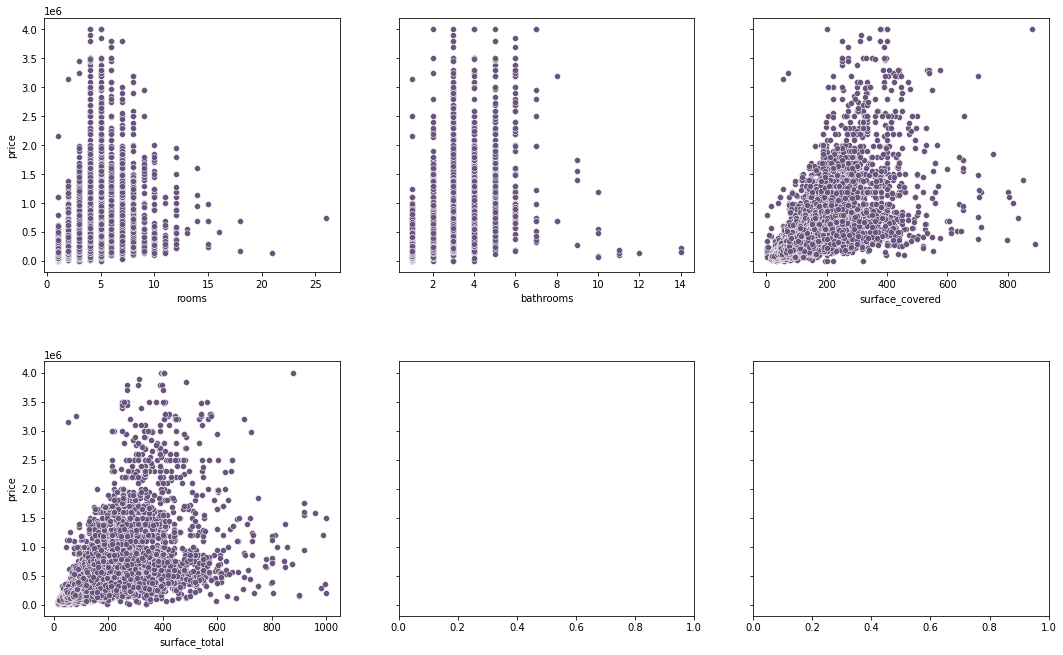

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=data_ml.rooms, y=data_ml.price, ax=ax[0, 0], color='#69547C', )
sns.scatterplot(x=data_ml.bathrooms, y=data_ml.price, ax=ax[0, 1], color='#69547C')
sns.scatterplot(x=data_ml.surface_covered, y=data_ml.price, ax=ax[0, 2], color='#69547C')
sns.scatterplot(x=data_ml.surface_total, y=data_ml.price, ax=ax[1, 0], color='#69547C')



In [28]:
data_ml.price = data_ml.price.map(np.log)

In [29]:
data_ml.head(2)

,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,7.0,2.0,140.0,140.0,11.938193
1,Boedo,PH,2.0,2.0,70.0,58.0,11.976659


In [30]:
data_ml._get_numeric_data().columns

Index(['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'], dtype='object')

In [47]:
#Separo datos en X e Y
X = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y = data_ml[['price']]

In [48]:
X.shape, Y.shape

((47776, 4), (47776, 1))

# Polynomial Features

In [49]:
poly = PolynomialFeatures(degree=2)

In [50]:
features_poly = poly.fit_transform(X)

In [51]:
poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names())

In [52]:
poly_df.head(2)

,1,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,x1 x3,x2^2,x2 x3,x3^2
0,1.0,7.0,2.0,140.0,140.0,49.0,14.0,980.0,980.0,4.0,280.0,280.0,19600.0,19600.0,19600.0
1,1.0,2.0,2.0,70.0,58.0,4.0,4.0,140.0,116.0,4.0,140.0,116.0,4900.0,4060.0,3364.0


In [54]:
poly_df.shape

(47776, 15)

## Escalado de Datos

In [55]:
std = StandardScaler()

In [56]:
std.fit(poly_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
data_escalada = std.transform(poly_df)

In [59]:
data_escalada = pd.DataFrame(data_escalada)

In [60]:
data_escalada.shape

(47776, 15)

##Enconding

In [61]:
l3 = data_ml['l3']

In [62]:
l3_get = pd.get_dummies(l3, prefix=('x'))

In [106]:
data_escalada.reset_index(drop=True, inplace=True)
l3_get.reset_index(drop=True, inplace=True)

In [107]:
data_escalada.shape, l3_get.shape

((47776, 15), (47776, 57))

In [110]:
data_eda = pd.merge(data_escalada, l3_get, how='left', left_index=True, right_index=True)

##Modelos

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data_eda, Y,
                                                    test_size=0.25,
                                                    random_state=40)

In [114]:
def evaluar_modelo(modelo,X_train,X_test,y_train,y_test):
    modelo.fit(X_train,y_train)
    print ("R2 del modelo  en train:", modelo.score(X_train,y_train) )
    print('RMSE en train:',np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
    print ("R2 del modelo en test:", modelo.score(X_test,y_test) )
    print('RMSE en test:',np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))

In [113]:
linear = LinearRegression()

In [115]:
evaluar_modelo(linear, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8357361102605454
RMSE en train: 0.27918243323697634
R2 del modelo en test: 0.8370873935792614
RMSE en test: 0.27593303933512336


In [116]:
ridge = RidgeCV()

In [117]:
evaluar_modelo(ridge, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8357339341042005
RMSE en train: 0.27918428252537525
R2 del modelo en test: 0.8370984984667171
RMSE en test: 0.2759236347296914


In [118]:
lasso = LassoCV()

In [119]:
evaluar_modelo(lasso, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8321731158935399
RMSE en train: 0.2821940174983779
R2 del modelo en test: 0.8334610046816809
RMSE en test: 0.2789872325172459


## Escalado de Datos


In [ ]:
X_escalada = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y_escalada = data_ml[['price']]

In [ ]:
std = StandardScaler()
#Entreno el modelo
std.fit(X_escalada)

In [ ]:
#Escalado
X_escalada_new = std.transform(X_escalada)

In [ ]:
#Convierto a Dataframe
X_escalada_new = pd.DataFrame(data=X_escalada_new, columns=['rooms', 'bathrooms','surface_total','surface_covered'])

In [ ]:
X_escalada_new.head(2)

In [ ]:
std.fit(Y_escalada)
Y_escalada_new = std.transform(Y_escalada)

In [ ]:
Y_escalada_new = pd.DataFrame(data=Y_escalada_new, columns=['price'])

##Eliminar Outliers

In [ ]:
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [ ]:
data_columnas = ['rooms','bathrooms','surface_total','surface_covered']
for i in data_columnas:
    X_escalada_new = limpiar_dataframe(X_escalada,i)

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))

In [ ]:
sns.kdeplot((X_escalada_new['rooms']))

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))
sns.kdeplot((X_escalada_new['rooms']))
sns.kdeplot((X_escalada_new['bathrooms']))
sns.kdeplot((X_escalada_new['surface_covered']))
plt.title('Rango de valores Datos Escalados')